In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# adding a comment to check github pipeline

In [140]:
crime_df = pd.read_csv('/Users/Erin/Downloads/final report/Crime_Data_from_2020_to_Present.csv')

display(crime_df.head())
print("=======================")
print(crime_df.columns.tolist())
print("=======================")
crime_df.head()

KeyboardInterrupt: 

In [112]:
#The columns within the Dataset
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [ ]:
#Give id
#crime_df.drop_duplicates(subset=crime_df.columns.difference(['DR_NO']), inplace=True)
#crime_df.info()

#De-duplicate (BY DR_NO ONLY)
dup_ct = crime_df.duplicated(subset=["DR_NO"]).sum()
print("Duplicate DR_NO rows:", dup_ct)
crime_df = crime_df.drop_duplicates(subset=["DR_NO"]).copy()

Duplicate DR_NO rows: 0


In [ ]:
#Drop DUplicate columns
crime_df.drop(['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis=1, inplace=True)
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 24 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [ ]:
# explore the dataset
columns = crime_df.columns
for col in columns:
    print('****',col,'****')
    print(crime_df[col].describe())

**** DR_NO ****
count    1.004991e+06
mean     2.202215e+08
std      1.319718e+07
min      8.170000e+02
25%      2.106169e+08
50%      2.209159e+08
75%      2.311103e+08
max      2.521041e+08
Name: DR_NO, dtype: float64
**** Date Rptd ****
count                    1004991
unique                      1896
top       02/02/2023 12:00:00 AM
freq                         929
Name: Date Rptd, dtype: object
**** DATE OCC ****
count                    1004991
unique                      1879
top       01/01/2020 12:00:00 AM
freq                        1164
Name: DATE OCC, dtype: object
**** TIME OCC ****
count    1.004991e+06
mean     1.339900e+03
std      6.510613e+02
min      1.000000e+00
25%      9.000000e+02
50%      1.420000e+03
75%      1.900000e+03
max      2.359000e+03
Name: TIME OCC, dtype: float64
**** AREA ****
count    1.004991e+06
mean     1.069174e+01
std      6.110255e+00
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      1.600000e+01
max      2.100000e+01

In [135]:
# select columns of interest 
# Dropped weapons and status categories
cols_of_interest = ['DR_NO', 'DATE OCC', 'Date Rptd', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'LOCATION', 'LAT', 'LON',]
crime_df = crime_df.loc[:, cols_of_interest].copy()
crime_df.shape

(1002614, 17)

In [ ]:
# REPLACE your "violent_crimes" filter (which actually filters to sexual-only) with a binary flag.
# 1 = violent, 0 = non-violent (rest of crimes).
# Only kept the violent sexual assult crimes. deleted 2 human trafficking crimes, and pimping.
# Added Initimate partner and other assult
violent_crimes = [
    "RAPE, FORCIBLE",
    "RAPE, ATTEMPTED",
    "SEXUAL PENETRATION W/ FOREIGN OBJECT",
    "UNLAWFUL SEX (INCLUDING MUTUAL CONSENT)",
    "ORAL COPULATION",
    "SODOMY/SEXUAL CONTACT B/W PENIS/ANUS",
    "BATTERY WITH SEXUAL CONTACT",
    "INTIMATE PARTNER - AGGRAVATED ASSAULT",
    "OTHER ASSAULT"
]

#crime_df = crime_df[crime_df['Crm Cd Desc'].isin(violent_crimes)]
# standardize crime description before flagging
crime_df["Crm Cd Desc"] = crime_df["Crm Cd Desc"].astype(str).str.upper().str.strip()
crime_df["SexualAssault"] = crime_df["Crm Cd Desc"].isin(violent_crimes).astype(int)
print("SexualAssault counts (1/0):")
print(crime_df["SexualAssault"].value_counts())

SexualAssault counts (1/0):
SexualAssault
0    976795
1     25819
Name: count, dtype: int64


In [138]:
# remove non-violent crimes and kept only sexual assult from now on
violent_df = crime_df[crime_df["SexualAssault"] == 1].copy()
print("\nShape after filtering only violent crimes:", violent_df.shape)


Shape after filtering only violent crimes: (25819, 18)


In [142]:
# summary statistics of columns of interest
columns = violent_df.columns
for col in columns:
    print('****',col,'****')
    print(violent_df[col].describe())

**** DR_NO ****
count    2.581900e+04
mean     2.181716e+08
std      1.245156e+07
min      2.001005e+08
25%      2.102191e+08
50%      2.203205e+08
75%      2.305048e+08
max      2.519041e+08
Name: DR_NO, dtype: float64
**** DATE OCC ****
count                      25819
unique                      1653
top       01/01/2020 12:00:00 AM
freq                          83
Name: DATE OCC, dtype: object
**** Date Rptd ****
count                      25819
unique                      1698
top       08/02/2021 12:00:00 AM
freq                          36
Name: Date Rptd, dtype: object
**** TIME OCC ****
count     25819
unique      846
top        1200
freq        877
Name: TIME OCC, dtype: object
**** AREA ****
count     25819
unique       21
top          12
freq       2417
Name: AREA, dtype: object
**** AREA NAME ****
count           25819
unique             21
top       77th Street
freq             2417
Name: AREA NAME, dtype: object
**** Rpt Dist No ****
count    25819.000000
mean      1096.

In [143]:
#updated data
violent_df

,DR_NO,DATE OCC,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,LOCATION,LAT,LON,SexualAssault
70,202013579,08/13/2020 12:00:00 AM,08/18/2020 12:00:00 AM,100,20,Olympic,2014,860,BATTERY WITH SEXUAL CONTACT,49,M,O,501.0,SINGLE FAMILY DWELLING,4000 W 2ND ST,34.0712,-118.3016,1
119,202100938,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,500,21,Topanga,2138,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,40,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",20400 SHERMAN WY,34.2011,-118.5794,1
225,201606018,02/18/2020 12:00:00 AM,02/19/2020 12:00:00 AM,1600,16,Foothill,1638,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,23,F,O,501.0,SINGLE FAMILY DWELLING,10500 TUJUNGA CANYON BL,34.2596,-118.2927,1
252,201317341,09/21/2020 12:00:00 AM,09/21/2020 12:00:00 AM,1050,13,Newton,1385,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,59,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",6200 S SAN PEDRO ST,33.9824,-118.2696,1
287,211907205,02/22/2020 12:00:00 AM,04/01/2021 12:00:00 AM,1,19,Mission,1915,122,"RAPE, ATTEMPTED",17,F,H,122.0,"VEHICLE, PASSENGER/TRUCK",DE GARMO AV,34.3009,-118.4442,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004682,242000642,03/17/2024 12:00:00 AM,03/17/2024 12:00:00 AM,1200,20,Olympic,2031,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,47,F,H,102.0,SIDEWALK,WESTERN,34.0597,-118.3091,1
1004690,240706084,02/19/2024 12:00:00 AM,02/19/2024 12:00:00 AM,1055,7,Wilshire,742,860,BATTERY WITH SEXUAL CONTACT,40,F,W,501.0,SINGLE FAMILY DWELLING,6100 WILSHIRE BL,34.0630,-118.3614,1
1004769,242004167,01/06/2024 12:00:00 AM,01/06/2024 12:00:00 AM,920,20,Olympic,2039,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,22,F,H,101.0,STREET,2800 SUNSET PL,34.0608,-118.2842,1
1004808,241509057,04/15/2024 12:00:00 AM,04/16/2024 12:00:00 AM,1700,15,N Hollywood,1526,625,OTHER ASSAULT,54,F,B,801.0,MTA BUS,6400 LANKERSHIM BL,34.1868,-118.3878,1


In [144]:
# drop if missing or null value, sort by condition
#crime_df = crime_df.dropna(subset=["Crm Cd Desc", "Vict Age", "Vict Sex"])
#crime_df = crime_df[(crime_df["Vict Age"] >= 10) & (crime_df["Vict Age"] <= 100)]
#crime_df.info()
#new
## Drop rows only if crime type is missing (can't classify crime otherwise)
# Creat a time bin and categorize age into category
before = len(violent_df)
violent_df = violent_df.dropna(subset=["Crm Cd Desc"])
print("Dropped rows missing Crm Cd Desc:", before - len(violent_df))

# fill categoricals with 'Unknown' (don't throw away rows)
for c in ["Vict Sex","Vict Age", "Vict Descent", "DATE OCC", "Date Rptd", "TIME OCC", "AREA", "Premis Desc", "AREA NAME"]:
    miss = violent_df[c].isna().sum()
    if miss:
        print(f"{c}: filling {miss} missing with 'Unknown'")
    violent_df[c] = violent_df[c].fillna("Unknown").astype(str).str.strip()

# normalize Vict Sex - keeps it consistent
violent_df["Vict Sex"] = (violent_df["Vict Sex"].str.upper()
                          .replace({"X": "UNKNOWN", "U": "UNKNOWN", "NAN": "UNKNOWN"}))

# --- Create Age Group Categories ---
violent_df["Vict Age"] = pd.to_numeric(violent_df["Vict Age"], errors="coerce")
violent_df = violent_df[(violent_df["Vict Age"] >= 0) & (violent_df["Vict Age"] <= 120)]

age_bins = [0, 17, 29, 44, 120]  # bins for age
age_labels = ["<18", "18-29", "30-44", "45+"]

violent_df["Age_Group"] = pd.cut(
    violent_df["Vict Age"],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=True
)
print(violent_df["Age_Group"].value_counts(dropna=False))

violent_df.info()

Dropped rows missing Crm Cd Desc: 0
Age_Group
18-29    9266
30-44    9036
45+      5126
<18      2391
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 25819 entries, 70 to 1004970
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DR_NO          25819 non-null  int64   
 1   DATE OCC       25819 non-null  object  
 2   Date Rptd      25819 non-null  object  
 3   TIME OCC       25819 non-null  object  
 4   AREA           25819 non-null  object  
 5   AREA NAME      25819 non-null  object  
 6   Rpt Dist No    25819 non-null  int64   
 7   Crm Cd         25819 non-null  int64   
 8   Crm Cd Desc    25819 non-null  object  
 9   Vict Age       25819 non-null  int64   
 10  Vict Sex       25819 non-null  object  
 11  Vict Descent   25819 non-null  object  
 12  Premis Cd      25819 non-null  float64 
 13  Premis Desc    25819 non-null  object  
 14  LOCATION       25819 non-null  object  


In [145]:
# ========= 6) (ADD) Location cleaning — needed for neighborhood/place effects =========
# make sure LAT/LON are numbers 
# (needed for mapping and neighborhood analysis)
for col in ["LAT", "LON"]:
    violent_df[col] = pd.to_numeric(violent_df[col], errors="coerce")

# flag invalid rows where coords are (0,0) 
# (not real LA locations, just placeholders)
bad_xy = (violent_df["LAT"] == 0) | (violent_df["LON"] == 0)

# set those invalid coords to NaN 
# (so they can be dropped in the next step)
violent_df.loc[bad_xy, ["LAT", "LON"]] = pd.NA

# drop rows with missing/invalid coords
# (important because we need real locations 
# to measure neighborhood concentration)
b4 = len(violent_df)
violent_df = violent_df.dropna(subset=["LAT", "LON"])

# show how many rows were removed
print("Rows dropped for invalid/missing coords:", b4 - len(violent_df))


Rows dropped for invalid/missing coords: 0


In [146]:
# NEW ADDED: --> To measure concentration of prior incidents
# With datetime_occurrence, you can say:
# "This incident happened on June 3rd at 11:45 PM in Hollywood,
# and in the 90 days before that, there were 5 other sexual assaults 
# in the same reporting district." 
# --> Needed for prior incident concentration feature for our model and research question!!

violent_df["DATE_OCC_dt"] = pd.to_datetime(violent_df["DATE OCC"], errors="coerce")

t = pd.to_numeric(violent_df["TIME OCC"], errors="coerce").fillna(0).astype(int)
hour = (t // 100).clip(0, 23)
minute = (t % 100).clip(0, 59)

violent_df["datetime_occurrence"] = pd.to_datetime(
    violent_df["DATE_OCC_dt"].dt.date.astype(str) + " " + hour.astype(str) + ":" + minute.astype(str),
    errors="coerce"
)

print("Missing datetime_occurrence:", violent_df["datetime_occurrence"].isna().sum())


/var/folders/qq/0d92ddwx6cgbw752f_sx5j9w0000gn/T/ipykernel_38099/850147351.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  violent_df["DATE_OCC_dt"] = pd.to_datetime(violent_df["DATE OCC"], errors="coerce")


Missing datetime_occurrence: 0


In [148]:
violent_df.groupby("Crm Cd Desc").size().sort_values(ascending=False)


Crm Cd Desc
INTIMATE PARTNER - AGGRAVATED ASSAULT    12652
OTHER ASSAULT                             4219
BATTERY WITH SEXUAL CONTACT               4147
RAPE, FORCIBLE                            3755
ORAL COPULATION                            727
RAPE, ATTEMPTED                            319
dtype: int64

**********
# Exploratory Data Analysis (EDA)
**********

The EDA uses the **cleaned `violent_df`** created in the first part of the notebook and focuses on:
- Victim **gender** distributions
- Counts by **neighborhood**
- **Time trends** (monthly/yearly)
- Cross-tabs: **Gender × Crime Type**, **Gender × Neighborhood**

## 1) Data Loading / Focus Filter

In [149]:
# Data Loading and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_datetime64_any_dtype

# Since we already filtered to violent_df, no conditional needed
df_eda = violent_df.copy()
print(f"EDA dataset ready: {len(df_eda):,} rows and {df_eda.shape[1]} columns (sexual assault only).")
display(df_eda.head(5))

EDA dataset ready: 25,819 rows and 21 columns (sexual assault only).


,DR_NO,DATE OCC,Date Rptd,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Vict Descent,Premis Cd,Premis Desc,LOCATION,LAT,LON,SexualAssault,Age_Group,DATE_OCC_dt,datetime_occurrence
70,202013579,08/13/2020 12:00:00 AM,08/18/2020 12:00:00 AM,100,20,Olympic,2014,860,BATTERY WITH SEXUAL CONTACT,49,...,O,501.0,SINGLE FAMILY DWELLING,4000 W 2ND ST,34.0712,-118.3016,1,45+,2020-08-13,2020-08-13 01:00:00
119,202100938,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,500,21,Topanga,2138,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,40,...,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",20400 SHERMAN WY,34.2011,-118.5794,1,30-44,2020-11-26,2020-11-26 05:00:00
225,201606018,02/18/2020 12:00:00 AM,02/19/2020 12:00:00 AM,1600,16,Foothill,1638,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,23,...,O,501.0,SINGLE FAMILY DWELLING,10500 TUJUNGA CANYON BL,34.2596,-118.2927,1,18-29,2020-02-18,2020-02-18 16:00:00
252,201317341,09/21/2020 12:00:00 AM,09/21/2020 12:00:00 AM,1050,13,Newton,1385,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,59,...,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",6200 S SAN PEDRO ST,33.9824,-118.2696,1,45+,2020-09-21,2020-09-21 10:50:00
287,211907205,02/22/2020 12:00:00 AM,04/01/2021 12:00:00 AM,1,19,Mission,1915,122,"RAPE, ATTEMPTED",17,...,H,122.0,"VEHICLE, PASSENGER/TRUCK",DE GARMO AV,34.3009,-118.4442,1,<18,2020-02-22,2020-02-22 00:01:00


## 2) Victim Gender Distribution

Counts by gender:


Vict Sex
F          20149
M           5576
UNKNOWN       92
H              2
Name: count, dtype: int64


Percent by gender:


Vict Sex
F          78.04
M          21.60
UNKNOWN     0.36
H           0.01
Name: count, dtype: float64

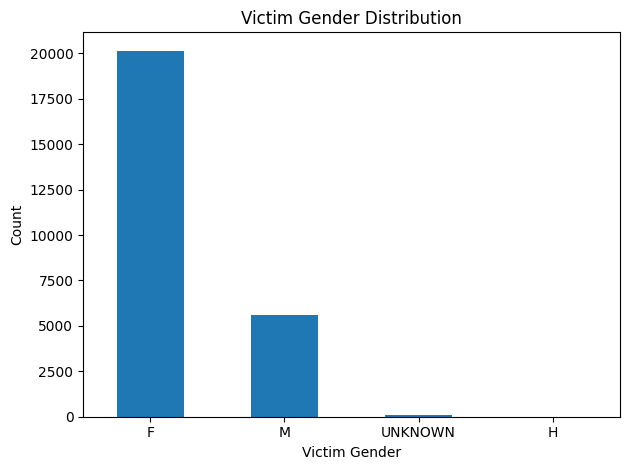

Male vs Female percentage difference: 56.440000000000005 %


In [151]:
# Victim Gender Distribution for violent crimes
gender_col = 'Vict Sex'  

# Count genders and calculate percentages
counts = violent_df[gender_col].value_counts(dropna=False)
pct = (counts / counts.sum() * 100).round(2)

# Print counts and percentages
print('Counts by gender:')
display(counts)
print('\nPercent by gender:')
display(pct)

# Bar chart of gender distribution
plt.figure()
counts.plot(kind='bar')
plt.title('Victim Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Victim Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Male vs Female percentage difference:", pct.get('F', 0) - pct.get('M', 0), "%")



## 3) Focus Crime Types — Distribution

Crm Cd Desc
INTIMATE PARTNER - AGGRAVATED ASSAULT    12652
OTHER ASSAULT                             4219
BATTERY WITH SEXUAL CONTACT               4147
RAPE, FORCIBLE                            3755
ORAL COPULATION                            727
RAPE, ATTEMPTED                            319
Name: count, dtype: int64

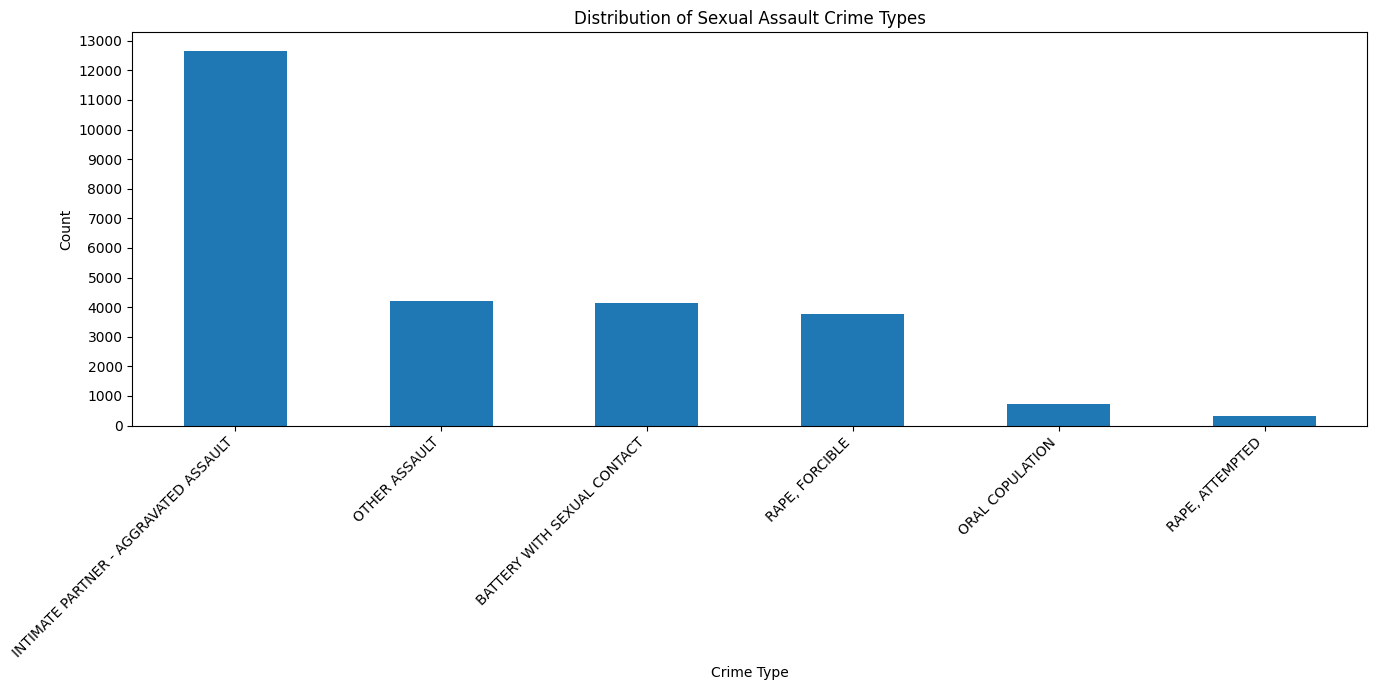

In [153]:
 # Crime Type Distribution
crime_col = 'Crm Cd Desc' if 'Crm Cd Desc' in violent_df.columns else None

if crime_col is None:
    print('Crime description column not found (expected "Crm Cd Desc").')
else:
    # Count crime types in violent_df
    crime_counts = violent_df[crime_col].value_counts()
    display(crime_counts)

    # Bar chart of crime types
    plt.figure(figsize=(14,7))
    crime_counts.plot(kind='bar')

    plt.title('Distribution of Sexual Assault Crime Types')
    plt.ylabel('Count')
    plt.xlabel('Crime Type')

    # Rotate labels to fit better
    plt.xticks(rotation=45, ha='right')

    # Y-axis increments of 1000
    max_val = crime_counts.max()
    plt.yticks(np.arange(0, max_val + 1000, 1000))

    plt.tight_layout()
    plt.show()


## 4) Neighborhood Counts (Focus Crimes)

AREA NAME
77th Street    2417
Central        2140
Southeast      1760
Southwest      1678
Rampart        1446
Hollywood      1348
Olympic        1274
Newton         1225
Harbor         1195
Mission        1194
N Hollywood    1161
West Valley    1059
Pacific        1055
Topanga         947
Hollenbeck      941
Wilshire        914
Van Nuys        906
Devonshire      839
West LA         793
Northeast       766
Foothill        761
Name: count, dtype: int64

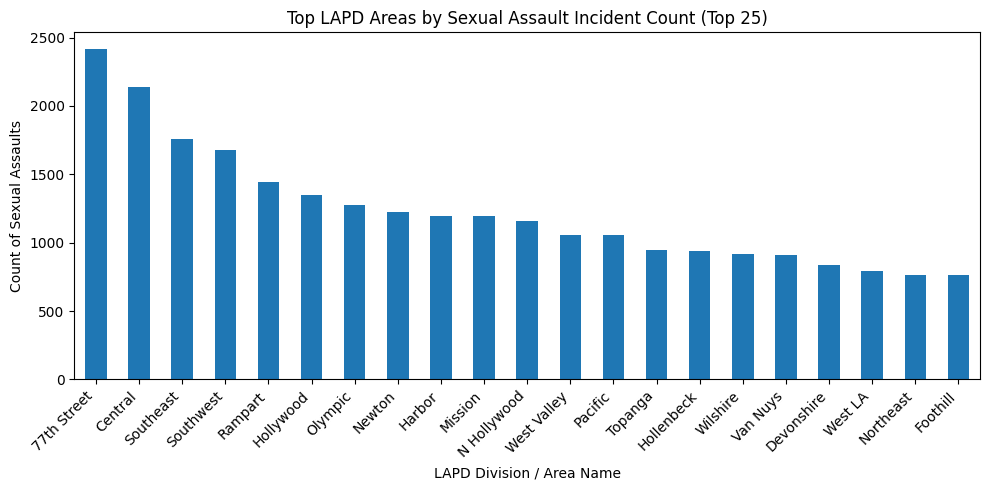

In [154]:
# Neighborhood Crime Counts (Sexual Assault Only)
neigh_col = 'AREA NAME'  

# Count top 25 neighborhoods/divisions
nbr_counts = violent_df[neigh_col].value_counts().head(25)
display(nbr_counts)

# Plot neighborhood distribution
plt.figure(figsize=(10,5))
nbr_counts.plot(kind='bar')
plt.title('Top LAPD Areas by Sexual Assault Incident Count (Top 25)')
plt.ylabel('Count of Sexual Assaults')
plt.xlabel('LAPD Division / Area Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 5) Premise into categories

In [155]:
# Define premise categories
premise_categories = {
    'RESIDENCE': 'Indoor',
    'SINGLE FAMILY DWELLING': 'Indoor',
    'APARTMENT': 'Indoor',
    'HOTEL/MOTEL': 'Indoor',
    'CONDOMINIUM': 'Indoor',
    'DORMITORY': 'Indoor',
    'GARAGE': 'Indoor',

    'PARKING LOT': 'Outdoor',
    'SIDEWALK': 'Outdoor',
    'STREET': 'Outdoor',
    'ALLEY': 'Outdoor',
    'PARK': 'Outdoor',
    'FREEWAY': 'Outdoor',
    'VACANT LOT': 'Outdoor',
    'PLAYGROUND': 'Outdoor',

    'STORE': 'Commercial',
    'SHOPPING MALL': 'Commercial',
    'RESTAURANT': 'Commercial',
    'BAR/CLUB': 'Commercial',
    'GAS STATION': 'Commercial',
    'BANK': 'Commercial',

    'SCHOOL': 'Institution',
    'CHURCH': 'Institution',
    'HOSPITAL': 'Institution',
    'GOVERNMENT BUILDING': 'Institution',

    'UNKNOWN': 'Unknown',
    'OTHER': 'Other'
}


In [156]:
# Convert Premis Desc to uppercase for standardized matching
violent_df['Premis Desc'] = violent_df['Premis Desc'].astype(str).str.upper().str.strip()

def categorize_premise(desc):
    for key, value in premise_categories.items():
        if key in desc:  # partial match
            return value
    return 'Other/Uncategorized'

violent_df['Premise_Category'] = violent_df['Premis Desc'].apply(categorize_premise)

# Quick check
print(violent_df['Premise_Category'].value_counts())

Premise_Category
Indoor                 13526
Outdoor                 6746
Other/Uncategorized     3526
Other                    891
Commercial               588
Institution              539
Unknown                    3
Name: count, dtype: int64


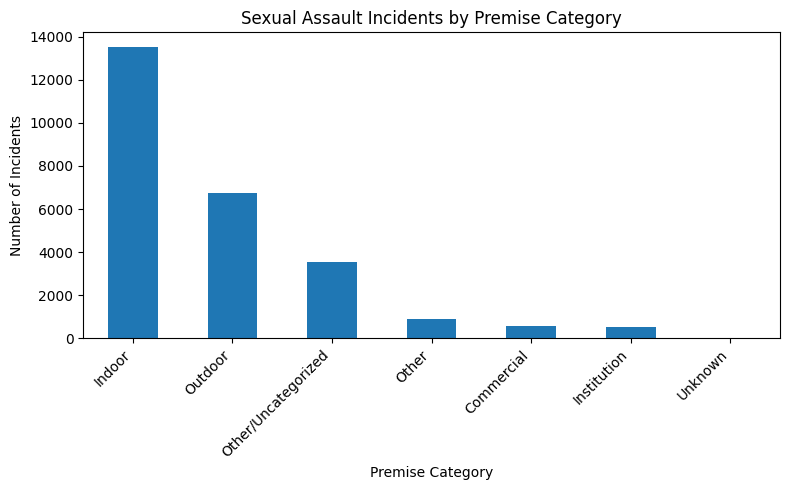

In [157]:
import matplotlib.pyplot as plt

# Count each category
premise_counts = violent_df['Premise_Category'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
premise_counts.plot(kind='bar')

plt.title('Sexual Assault Incidents by Premise Category')
plt.xlabel('Premise Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6) Time Trends (Monthly / Yearly)

/var/folders/qq/0d92ddwx6cgbw752f_sx5j9w0000gn/T/ipykernel_38099/4267184350.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda[date_col] = pd.to_datetime(df_eda[date_col], errors='coerce')
/var/folders/qq/0d92ddwx6cgbw752f_sx5j9w0000gn/T/ipykernel_38099/4267184350.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = tmp.resample('M').size()
/var/folders/qq/0d92ddwx6cgbw752f_sx5j9w0000gn/T/ipykernel_38099/4267184350.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = tmp.resample('Y').size()


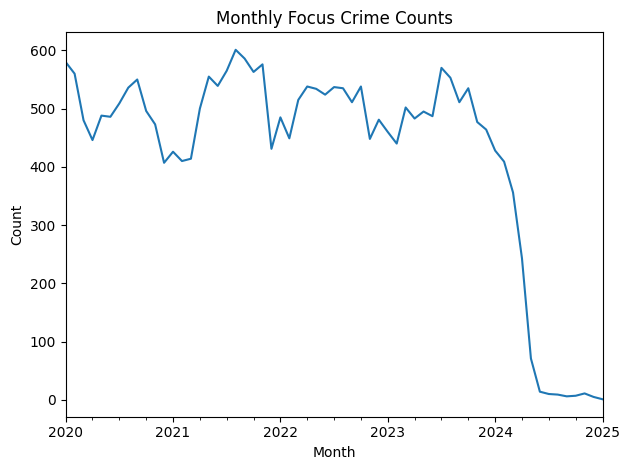

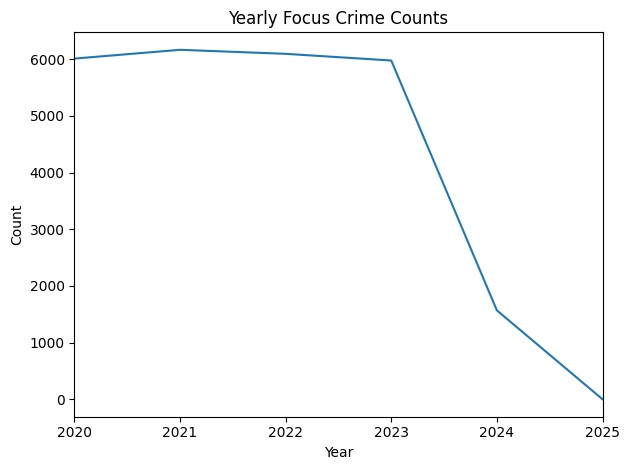

In [159]:
# Time Trends
date_candidates = ['DATE OCC','Date Rptd']
date_col = next((c for c in date_candidates if c in df_eda.columns), None)
if date_col is None:
    print('No date column found among:', date_candidates)
else:
    # Convert to datetime if not already
    if not is_datetime64_any_dtype(df_eda[date_col]):
        try:
            df_eda[date_col] = pd.to_datetime(df_eda[date_col], errors='coerce')
        except Exception as e:
            print('Failed to parse dates:', e)

    # Drop rows with NaT dates just in case
    tmp = df_eda.dropna(subset=[date_col]).copy()
    if not tmp.empty:
        # Set date as index and resample monthly and yearly
        tmp = tmp.set_index(date_col).sort_index()
        monthly = tmp.resample('M').size()
        yearly = tmp.resample('Y').size()

        # Plot monthly trend
        plt.figure()
        monthly.plot()
        plt.title('Monthly Focus Crime Counts')
        plt.ylabel('Count')
        plt.xlabel('Month')
        plt.tight_layout()
        plt.show()

        # Plot yearly trend
        plt.figure()
        yearly.plot()
        plt.title('Yearly Focus Crime Counts')
        plt.ylabel('Count')
        plt.xlabel('Year')
        plt.tight_layout()
        plt.show()
    else:
        print('All dates are NaT after parsing; skipping time trends.')

## 7) Gender x Crime Type

Crm Cd Desc,BATTERY WITH SEXUAL CONTACT,INTIMATE PARTNER - AGGRAVATED ASSAULT,ORAL COPULATION,OTHER ASSAULT,"RAPE, ATTEMPTED","RAPE, FORCIBLE"
Vict Sex,,,,,,
F,3751,9797,534,2033,315,3719
H,0,2,0,0,0,0
M,375,2840,186,2139,4,32
UNKNOWN,21,13,7,47,0,4


<Figure size 1400x600 with 0 Axes>

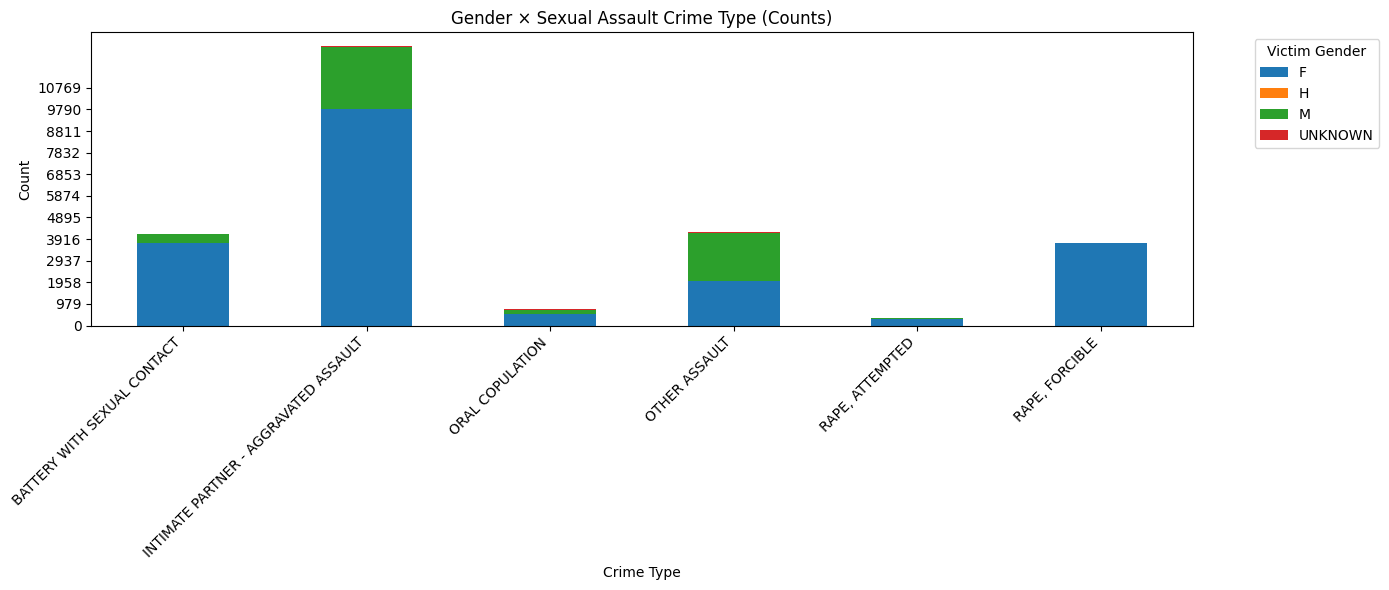

In [160]:
# Gender × Crime Type Bar Graph (Sexual Assaults Only)

gender_col = 'Vict Sex'
crime_col = 'Crm Cd Desc'

# Create crosstab
ct = pd.crosstab(violent_df[gender_col], violent_df[crime_col])
display(ct)

# Create stacked bar chart
plt.figure(figsize=(14,6))
ct.T.plot(kind='bar', stacked=True, figsize=(14,6))

plt.title('Gender × Sexual Assault Crime Type (Counts)')
plt.ylabel('Count')
plt.xlabel('Crime Type')
plt.xticks(rotation=45, ha='right')

# Legend outside chart
plt.legend(title='Victim Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis increments dynamically
max_val = ct.values.max()  # highest count across matrix
plt.yticks(np.arange(0, max_val + max_val * 0.1, max(max_val // 10, 100)))  # adjust step

plt.tight_layout()
plt.show()


## 8) Victim Gender x Crime Type (Heatmap)

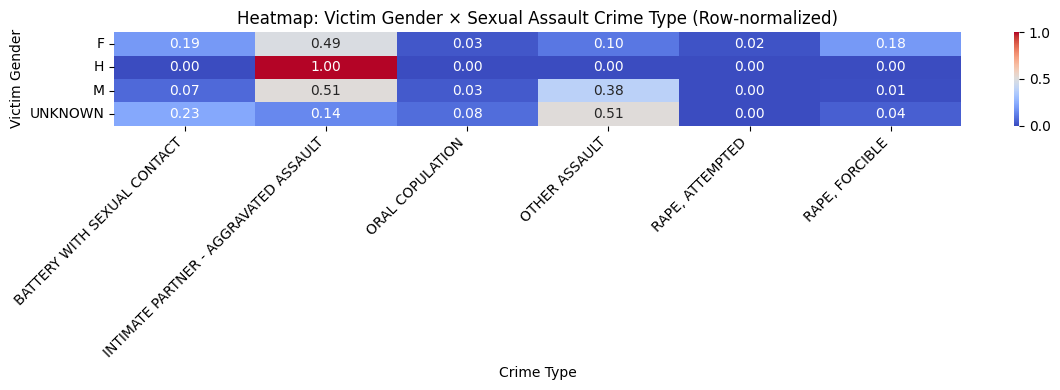

In [161]:
# Victim Gender × Crime Type Heatmap (Violent Crimes Only)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

gender_col = 'Vict Sex'
crime_col = 'Crm Cd Desc'

# Create normalized crosstab
ct_heat = pd.crosstab(violent_df[gender_col], violent_df[crime_col], normalize='index')

plt.figure(figsize=(12, max(4, 0.6 * len(ct_heat.index))))  # adjusts height based on number of categories
sns.heatmap(ct_heat, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap: Victim Gender × Sexual Assault Crime Type (Row-normalized)")
plt.ylabel("Victim Gender")
plt.xlabel("Crime Type")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 9)Crime type (sexual assult focus x Neighborhood Heatmap)

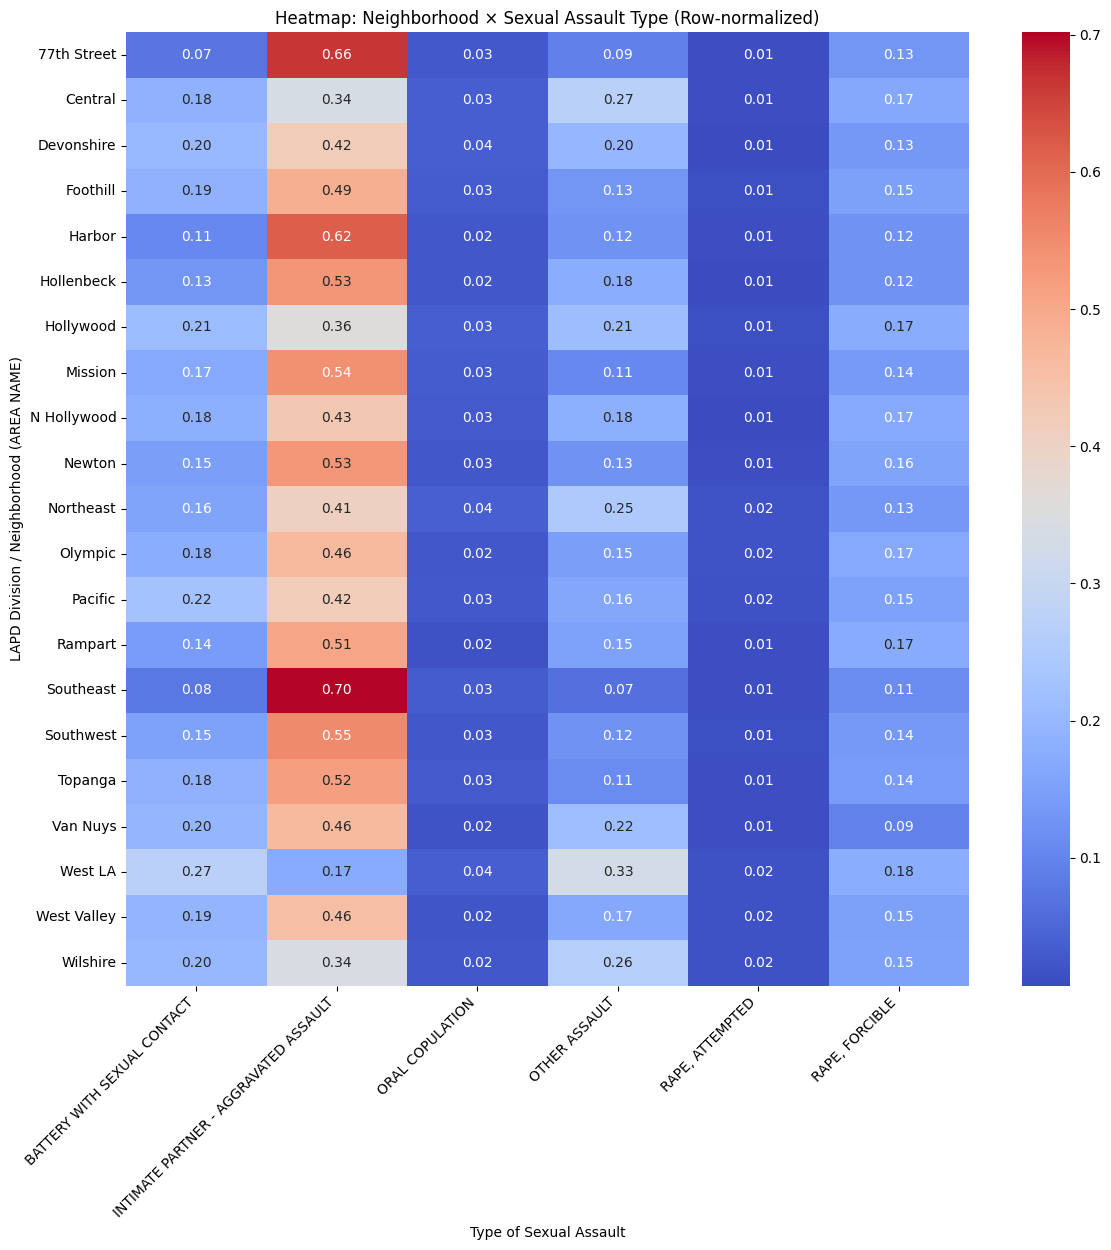

In [162]:
# ========= Crime Type × Neighborhood Heatmap (Sexual Assault Cases Only) =========
import seaborn as sns
import matplotlib.pyplot as plt

# Create crosstab directly from violent_df
ct_heat = pd.crosstab(
    violent_df["AREA NAME"], 
    violent_df["Crm Cd Desc"], 
    normalize="index"  # row-normalized: each neighborhood sums to 1
)

# Plot heatmap with dynamic height
plt.figure(figsize=(12, max(4, 0.6 * len(ct_heat.index))))
sns.heatmap(ct_heat, annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Heatmap: Neighborhood × Sexual Assault Type (Row-normalized)")
plt.ylabel("LAPD Division / Neighborhood (AREA NAME)")
plt.xlabel("Type of Sexual Assault")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 11) Female, Male, and Unkown for each race who experinced sexual assults.


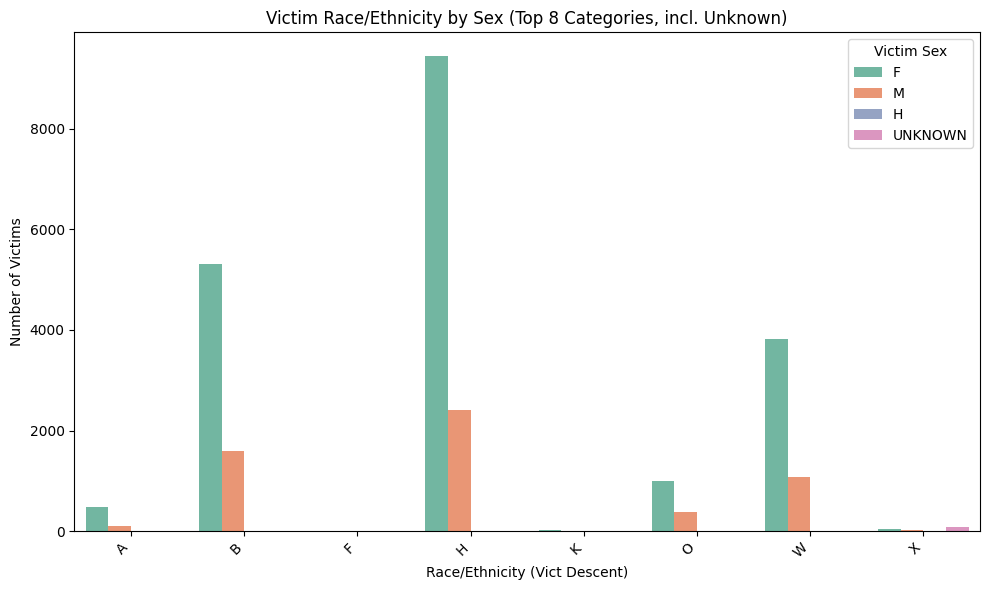

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use all sex categories (F, M, UNKNOWN)
df_race_sex = violent_df.copy()

# Get top 8 race categories for readability
top_races = df_race_sex["Vict Descent"].value_counts().head(8).index
df_race_sex = df_race_sex[df_race_sex["Vict Descent"].isin(top_races)]

# Count per race × sex
race_sex_counts = (
    df_race_sex.groupby(["Vict Descent","Vict Sex"])
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=race_sex_counts,
    x="Vict Descent",
    y="Count",
    hue="Vict Sex",
    palette="Set2"
)

plt.title("Victim Race/Ethnicity by Sex (Top 8 Categories, incl. Unknown)")
plt.xlabel("Race/Ethnicity (Vict Descent)")
plt.ylabel("Number of Victims")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Victim Sex")
plt.tight_layout()
plt.show()

********
# Limitations and Data Bias
********

# Observed Trends Within the EDA

### Insights from EDA

- When examining trends in the dataset, we focused on both **women** and **men**.  
  The top five most common types of sexual assault were:  
  - **Battery with Sexual Contact**  
  - **Rape (Forcible)**  
  - **Oral Copulation**  
  - **Human Trafficking – Commercial Sex Acts**  
  - **Rape (Attempted)**  

  Among these, **Battery with Sexual Contact (4,053 cases)** and **Rape, Forcible (3,679 cases)** were the most prevalent.  


- The **top three neighborhoods** with the highest number of reported incidents were:  
  1. **77th Street** – 899 cases  
  2. **Central** – 844 cases  
  3. **Hollywood** – 618 cases  

  These areas appear to be at greater risk.  



- The **victim gender distribution** shows a strong imbalance:  
  - **Women:** 8,805 reported cases  
  - **Men:** 578 reported cases  
  - **Unknown/Not reported:** 15 cases  

  This indicates women are more affected compared to men.  


- Looking at **victim age statistics**, the **average victim age is about 29 years old**.  
  Reported ages ranged from **10 years (youngest) to 99 years (oldest)**.  

  When broken down by gender:  
  - **Women:** average age ~29  
  - **Men:** average age ~26  
  - **Unknown sex:** average age ~26  


- During **data processing and cleaning**, no significant **missing data** was found.  
  Any missing or ambiguous values were handled appropriately, ensuring that the dataset was ready for analysis.  


## Limitations and Bias

- In cases of sexual assault, many victims do not report crimes, including sexual assault incidents. This applies to both women and men of all ages. Underreporting leads to missing cases, making the dataset less accurate than desired.  

- Another limitation is the presence of missing demographics within the data, such as "Unknown" values in victim sex and other reported characteristics.  

- A bias in the dataset comes from its starting point in 2020. There may have been more or fewer cases before this time, so the dataset does not reflect long-term trends.  

- Geographic bias is another limitation. Some records had missing values in the "LAT" and "LON" columns, which creates gaps in location-based analysis.  

- Another bias is systemic bias. Historical and structural inequalities—such as race, immigration status, and economic conditions—can influence who reports crimes and how cases are handled. These broader systemic factors are not captured in the dataset.  


In [164]:
# ALL THIS INFO IS FOR THE SEXUAL ASSAULT DATASET - FOR THE INSIGHT EDA SECTION ONLY

# Most common sexual assault types
print("Top 5 Sexual Assault Types:")
print(violent_df["Crm Cd Desc"].value_counts().head(5))

# Neighborhoods with the most incidents
print("\nTop 5 Neighborhoods (by reported incidents):")
print(violent_df["AREA NAME"].value_counts().head(5))

# Victim sex distribution
print("\nVictim Sex Distribution:")
print(violent_df["Vict Sex"].value_counts())

# ---- Victim age summary ----
print("\nVictim Age Statistics (Overall):")
print(violent_df["Vict Age"].describe())
print("=======================")

# Group by Victim Sex and get descriptive statistics for Victim Age
print("\nVictim Age Statistics by Gender:")
print(violent_df.groupby("Vict Sex")["Vict Age"].describe())

# Check missing values in key columns
print("\nMissing values in key variables:")
print(violent_df[["Vict Age", "Vict Sex", "Vict Descent", "LAT", "LON"]].isna().sum())


Top 5 Sexual Assault Types:
Crm Cd Desc
INTIMATE PARTNER - AGGRAVATED ASSAULT    12652
OTHER ASSAULT                             4219
BATTERY WITH SEXUAL CONTACT               4147
RAPE, FORCIBLE                            3755
ORAL COPULATION                            727
Name: count, dtype: int64

Top 5 Neighborhoods (by reported incidents):
AREA NAME
77th Street    2417
Central        2140
Southeast      1760
Southwest      1678
Rampart        1446
Name: count, dtype: int64

Victim Sex Distribution:
Vict Sex
F          20149
M           5576
UNKNOWN       92
H              2
Name: count, dtype: int64

Victim Age Statistics (Overall):
count    25819.000000
mean        33.286340
std         14.003104
min          0.000000
25%         23.000000
50%         31.000000
75%         41.000000
max         99.000000
Name: Vict Age, dtype: float64

Victim Age Statistics by Gender:
            count       mean        std   min   25%   50%    75%   max
Vict Sex                                  